In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

#### Pima-indians-diabetes data set을 이용하여 아래를 구하시오.

In [2]:
# Data.
df     = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, :-1]
y_data = df['Outcome']   # binary data
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.25, stratify=y_data, random_state=1)  

- 1. Logistic 분류기를 선택하여 GridSearch로 최적 파라미터를 구하고, Accuracy, Precision, Recall, F1 score, ROC Curve , Vadation Curve 를  구하시오

- Accuracy of Logit model -
----------------------------------------------------------------------------------------------------------------------------------
Accuracy of train data         : 78.0%
Accuracy of test data          : 78.0%
----------------------------------------------------------------------------------------------------------------------------------
- Precision  of Logit model -
----------------------------------------------------------------------------------------------------------------------------------
Precision score of train data  : 73.0%
Precision score of test data   : 75.0%
----------------------------------------------------------------------------------------------------------------------------------
- Recall  of Logit model -
----------------------------------------------------------------------------------------------------------------------------------
Recall score of train data     : 61.0%
Recall score of test data      : 54.0%
--------------------------

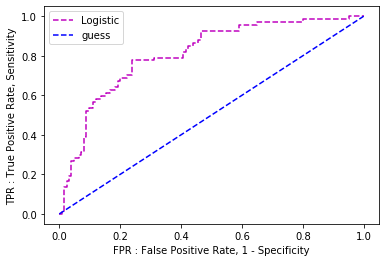

----------------------------------------------------------------------------------------------------------------------------------
- Validatain Curve  of Logit model -
----------------------------------------------------------------------------------------------------------------------------------


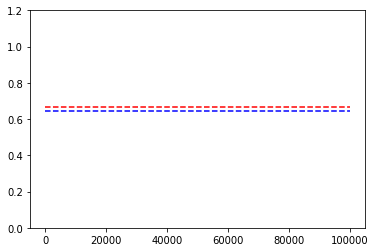

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [3]:
# Logit model. 
model_Logit = make_pipeline( StandardScaler(),  LogisticRegression() )
param_value = { 'logisticregression__penalty': [ 'l1', 'l2', 'elasticnet', 'none' ],
                'logisticregression__C'      : np.logspace( -5, 5, 11 ),
                'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',]
              }
grid_search_logit = GridSearchCV( model_Logit , param_grid = param_value ) 
grid_search_logit.fit( x_train, y_train )

# Accuracy of Logit model.
print('- Accuracy of Logit model -')
print('-'*130)
print(f'Accuracy of train data         : {round( grid_search_logit.best_estimator_.score( x_train, y_train ), 2)*100 }%')
print(f'Accuracy of test data          : {round( grid_search_logit.best_estimator_.score( x_test, y_test ),   2)*100 }%')
print('-'*130)

# Prediction of grid_search_logit.
y_pred_train  = grid_search_logit.best_estimator_.predict( x_train )
y_pred_test   = grid_search_logit.best_estimator_.predict( x_test )

# Precision of grid_search_logit.
print('- Precision  of Logit model -')
print('-'*130)
print(f'Precision score of train data  : { round(m.precision_score( y_train, y_pred_train ), 2)*100 }%' )
print(f'Precision score of test data   : { round(m.precision_score( y_test,   y_pred_test ), 2)*100 }%' )
print('-'*130)

# Recall of grid_search_logit.
print('- Recall  of Logit model -')
print('-'*130)
print(f'Recall score of train data     : { round(m.recall_score( y_train, y_pred_train  ), 2)*100   }%' )
print(f'Recall score of test data      : { round(m.recall_score( y_test,   y_pred_test  ), 2)*100   }%' )
print('-'*130)

# F1 score of grid_search_logit.
print('- F1 score  of Logit model -')
print('-'*130)
print(f'F1 score of train data        : { round(m.f1_score( y_train, y_pred_train  ), 2)*100       }%' )
print(f'F1 score of test data         : { round(m.f1_score( y_test,   y_pred_test  ), 2)*100       }%' )
print('-'*130)

# ROC Curve
print('- ROC Curve  of Logit model -')
print('-'*130)
FPR, TPR, Thresholds = m.roc_curve( y_test, grid_search_logit.predict_proba( x_test )[:,1] )    
plt.plot( FPR, TPR, 'm--', label='Logistic')
plt.plot( [0,1], [0,1], 'b--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - Specificity' ); plt.ylabel( 'TPR : True Positive Rate, Sensitivity' )
plt.legend()
plt.show()
print('-'*130)

# Validataion Curve
print('- Validatain Curve  of Logit model -')
print('-'*130)
param_range = np.logspace( -5, 5, 11 )
train_score, test_score = validation_curve( estimator=grid_search_logit.best_estimator_, X=x_train, y=y_train, 
                                           param_name='logisticregression__C', param_range=param_range, scoring='f1' )

plt.ylim( 0, 1.2 )
plt.plot( param_range, train_score.mean( axis=1 ), 'r--' )
plt.plot( param_range, test_score.mean( axis=1 ),  'b--' )
plt.show()
( train_score.mean( axis=1 ) - test_score.mean( axis=1 ) ).round(2)


- 2. 여러개의 분류기를 선택하여 GridSearch로 최적 파라미터를 구하고
Soft Voting 방식으로 Accuracy, Precision, Recall, F1 score, ROC Curve , Vadation Curve 를  구하시오.

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:09<00:00, 43.32s/it]


- Accuracy of Voting -
----------------------------------------------------------------------------------------------------------------------------------
Accuracy of train data         : 90.0%
Accuracy of test data          : 77.0%
----------------------------------------------------------------------------------------------------------------------------------
- Precision of Voting model -
----------------------------------------------------------------------------------------------------------------------------------
Precision score of train data  : 90.0%
Precision score of test data   : 71.0%
----------------------------------------------------------------------------------------------------------------------------------
- Recall of Voting model -
----------------------------------------------------------------------------------------------------------------------------------
Recall score of train data     : 79.0%
Recall score of test data      : 55.00000000000001%
------------------

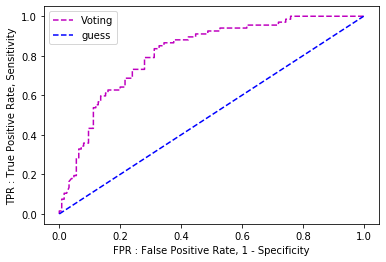

----------------------------------------------------------------------------------------------------------------------------------
- Validatain Curve  of Voting model -
----------------------------------------------------------------------------------------------------------------------------------


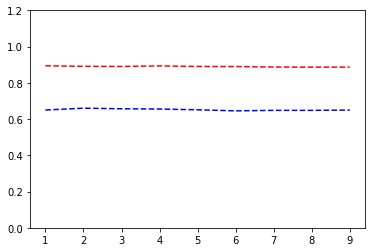

array([0.24, 0.23, 0.23, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24])

In [4]:
# pipeline을 쓸 수가 없어서 X_data로 정규화.
X_data  = StandardScaler().fit_transform( x_data )
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.25, stratify=y_data, random_state=1 ) 

# GridSearch 
Classifiers    = []
Parameters     = []

MLP            = MLPClassifier(hidden_layer_sizes=(100, 2),max_iter=50, early_stopping = True)
RF             = RandomForestClassifier(n_estimators=100, oob_score=True )
KNN            = KNeighborsClassifier()

Parameters_MLP = {'max_iter': [30,40,50], 
                  'hidden_layer_sizes':[(100,2), (80,2), (60,2), (40,2)], 
                  'random_state':[0,1,123,42],
                  'learning_rate' : ['constant','adaptive'],
                  'learning_rate_init':[0.001,0.003,0.005,0.0009]
                 }

Parameters_RF  = {"max_features": [2,3,4],
                 "random_state":[0,1,123,42],
                 "n_estimators" :[100,300,50,200]
                 }

Parameters_KNN = {"n_neighbors": [3,5,7,9],
                  "weights": ['uniform','distance'],
                   "p":[1,2,3]
                 }

Classifiers.append( MLP )
Classifiers.append( RF  )
Classifiers.append( KNN )

Parameters.append( Parameters_MLP )
Parameters.append( Parameters_RF  )
Parameters.append( Parameters_KNN )

def gridSearchCV( models, params, count ):
    best_models=[]
    for i in tqdm(range( 0, count )):
        model_grid = GridSearchCV( models[i], Parameters[i] )
        model_grid.fit( X_train, y_train )
        best_models.append( model_grid.best_estimator_ )
    return best_models

best_model_list = gridSearchCV( Classifiers, Parameters, 3 )


# Voting model
model_vote = VotingClassifier( estimators=[('MLP', best_model_list[0]), ('Randomforest', best_model_list[1]), 
                             ('KNN', best_model_list[2])],  voting='soft' )
model_vote.fit( X_train, y_train )

# Accuracy of voting.
print('- Accuracy of Voting -')
print('-'*130)
print(f'Accuracy of train data         : {round( model_vote.score( X_train, y_train ), 2)*100 }%')
print(f'Accuracy of test data          : {round( model_vote.score( X_test, y_test ),   2)*100 }%')
print('-'*130)

# Prediction of Voting model.
y_pred_train  = model_vote.predict( X_train )
y_pred_test   = model_vote.predict( X_test )

# Precision of  Voting model.
print('- Precision of Voting model -')
print('-'*130)
print(f'Precision score of train data  : { round(m.precision_score( y_train, y_pred_train ), 2)*100 }%' )
print(f'Precision score of test data   : { round(m.precision_score( y_test,   y_pred_test ), 2)*100 }%' )
print('-'*130)

# Recall of Voting model.
print('- Recall of Voting model -')
print('-'*130)
print(f'Recall score of train data     : { round(m.recall_score( y_train, y_pred_train  ), 2)*100   }%' )
print(f'Recall score of test data      : { round(m.recall_score( y_test,   y_pred_test  ), 2)*100   }%' )
print('-'*130)

# F1 score of  Voting model.
print('- F1 score of Voting model -')
print('-'*130)
print(f'F1 score of train data        : { round(m.f1_score( y_train, y_pred_train  ), 2)*100       }%' )
print(f'F1 score of test data         : { round(m.f1_score( y_test,   y_pred_test  ), 2)*100       }%' )
print('-'*130)

# ROC Curve
print('- ROC Curve of Voting model -')
print('-'*130)
FPR, TPR, Thresholds = m.roc_curve( y_test, model_vote.predict_proba( X_test )[:,1] )    
plt.plot( FPR, TPR, 'm--', label='Voting')
plt.plot( [0,1], [0,1], 'b--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - Specificity' ); plt.ylabel( 'TPR : True Positive Rate, Sensitivity' )
plt.legend()
plt.show()
print('-'*130)

# Validataion Curve
print('- Validatain Curve  of Voting model -')
print('-'*130)
# model_vote.get_params().keys()
param_range = list(range(1,10,1))
train_score, test_score = validation_curve( estimator=model_vote, X=x_train, y=y_train, 
                                           param_name='KNN__p',
                                           param_range=param_range, scoring='f1' )
plt.ylim( 0, 1.2 )
plt.plot( param_range, train_score.mean( axis=1 ), 'r--' )
plt.plot( param_range, test_score.mean( axis=1 ),  'b--' )
plt.show()
( train_score.mean( axis=1 ) - test_score.mean( axis=1 ) ).round(2)

- 3. Random Forest를 선택하여 GridSearch로 최적 파라미터를 구하고,
 Bagging 방식으로 Accuracy, Precision, Recall, F1 score, ROC Curve , Vadation Curve 를  구하시오.


Best Parameter : {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy of train data : 35.0%
Accuracy of test data  : 35.0%
----------------------------------------------------------------------------------------------------------------------------------
- Accuracy of Bagging model -
----------------------------------------------------------------------------------------------------------------------------------
Accuracy of train data         : 79.7%
Accuracy of test data          : 73.4%
----------------------------------------------------------------------------------------------------------------------------------
- Precision  of Bagging model -
----------------------------------------------------------------------------------------------------------------------------------
Precision score of train data  : 80.4%
Precision score of test data   : 71.1%
--------------------------------------------------------------------------------------------

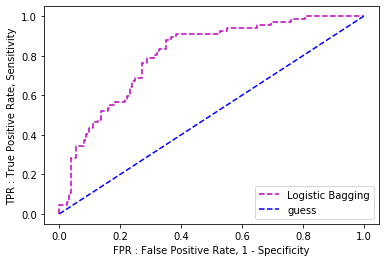

----------------------------------------------------------------------------------------------------------------------------------
- Validatain Curve  of Bagging model -
----------------------------------------------------------------------------------------------------------------------------------


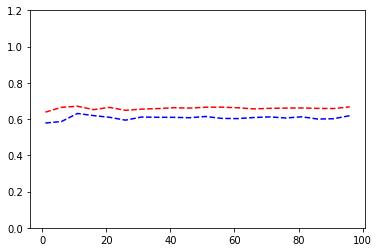

array([0.06, 0.08, 0.04, 0.03, 0.05, 0.05, 0.04, 0.05, 0.05, 0.05, 0.05,
       0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.05])

In [5]:
# Random forest model. 
model_forest =  RandomForestClassifier() 
param_value  = { 'n_estimators' : [10, 50, 100],
                 'max_depth' : [6, 8, 10, 12],
                 'min_samples_leaf' : [8, 12, 16],
                 'min_samples_split' : [8, 16, 20]
                }

grid_search_forest = GridSearchCV( model_forest , param_grid = param_value ) 
grid_search_forest.fit( X_train, y_train )

print(f'Best Parameter : { grid_search_forest.best_params_}')
print(f'Accuracy of train data : { round(grid_search_forest.score( x_train , y_train ), 2)*100 }%' )
print(f'Accuracy of test data  : { round(grid_search_forest.score( x_test , y_test   ), 2)*100 }%' )
print('-'*130)

# Bagging model.
model_bagg  = BaggingClassifier( grid_search_forest.best_estimator_, max_samples=0.5 ) 
model_bagg.fit( X_train, y_train )

# Accuracy of bagging model.
print('- Accuracy of Bagging model -')
print('-'*130)
print(f'Accuracy of train data         : {round( model_bagg.score( X_train, y_train ), 3)*100 }%')
print(f'Accuracy of test data          : {round( model_bagg.score( X_test, y_test ),   3)*100 }%')
print('-'*130)

# Prediction of bagging model.
y_pred_train  = model_bagg.predict( X_train )
y_pred_test   = model_bagg.predict( X_test )

# Precision of bagging model.
print('- Precision  of Bagging model -')
print('-'*130)
print(f'Precision score of train data  : { round(m.precision_score( y_train, y_pred_train ), 3)*100 }%' )
print(f'Precision score of test data   : { round(m.precision_score( y_test,   y_pred_test ), 3)*100 }%' )
print('-'*130)

# Recall of bagging model.
print('- Recall  of Bagging model -')
print('-'*130)
print(f'Recall score of train data     : { round(m.recall_score( y_train, y_pred_train  ), 3)*100   }%' )
print(f'Recall score of test data      : { round(m.recall_score( y_test,   y_pred_test  ), 3)*100   }%' )
print('-'*130)

# F1 score of bagging model.
print('- F1 score  of Bagging model -')
print('-'*130)
print(f'F1 score of train data        : { round(m.f1_score( y_train, y_pred_train  ), 3)*100       }%' )
print(f'F1 score of test data         : { round(m.f1_score( y_test,   y_pred_test  ), 3)*100       }%' )
print('-'*130)

# ROC Curve
print('- ROC curve  of Bagging model -')
print('-'*130)
FPR, TPR, Thresholds = m.roc_curve( y_test, model_bagg.predict_proba( X_test )[:,1] )    # Predict proba of Bagging
plt.plot( FPR, TPR, 'm--', label='Logistic Bagging')
plt.plot( [0,1], [0,1], 'b--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - Specificity' ); plt.ylabel( 'TPR : True Positive Rate, Sensitivity' )
plt.legend()
plt.show()
print('-'*130)

# Validataion Curve
print('- Validatain Curve  of Bagging model -')
print('-'*130)
param_range = list(range(1,100,5))
train_score, test_score = validation_curve( estimator=model_bagg, X=x_train, y=y_train, 
                                           param_name='n_estimators', param_range=param_range, scoring='f1' )

plt.ylim( 0, 1.2 )
plt.plot( param_range, train_score.mean( axis=1 ), 'r--' )
plt.plot( param_range, test_score.mean( axis=1 ),  'b--' )
plt.show()
( train_score.mean( axis=1 ) - test_score.mean( axis=1 ) ).round(2)